## Import python libraries for data import and examination

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Web scraping to download csv file with real-world data

In [2]:
import requests

url = "https://qubeshub.org/publications/1220/serve/1/3861?el=1&download=1"

r = requests.get(url)
filename = r.headers["Content-Disposition"].split('"')[1]

with open(filename, "wb") as f_out:
    print(f"Downloading {filename}")
    f_out.write(r.content)

## Import a CSV file into a Pandas DataFrame

In [3]:
df = pd.read_csv('Elephant Morphometrics and Tusk Size-originaldata-3861.csv')

In [4]:
print(df.head())
df.shape
df.isnull().sum()

  Years of sample collection Elephant ID Sex  Estimated Age (years)  \
0                    1966-68          12   f                  0.080   
1                    1966-68          34   f                  0.080   
2                    1966-68         162   f                  0.083   
3                    1966-68         292   f                  0.083   
4                    1966-68          11   f                  0.250   

   shoulder Height in  cm  Tusk Length in cm  Tusk Circumference   in cm  
0                   102.0                NaN                         NaN  
1                    89.0                NaN                         NaN  
2                    89.0                NaN                         NaN  
3                    92.0                NaN                         NaN  
4                   133.0                NaN                         NaN  


Years of sample collection      0
Elephant ID                     0
Sex                             0
Estimated Age (years)           3
shoulder Height in  cm          1
Tusk Length in cm             180
Tusk Circumference   in cm    163
dtype: int64

## Examine data

In [5]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Years of sample collection  777 non-null    object 
 1   Elephant ID                 777 non-null    object 
 2   Sex                         777 non-null    object 
 3   Estimated Age (years)       774 non-null    float64
 4   shoulder Height in  cm      776 non-null    float64
 5   Tusk Length in cm           597 non-null    float64
 6   Tusk Circumference   in cm  614 non-null    float64
dtypes: float64(4), object(3)
memory usage: 42.6+ KB


Index(['Years of sample collection', 'Elephant ID', 'Sex',
       'Estimated Age (years)', 'shoulder Height in  cm', 'Tusk Length in cm',
       'Tusk Circumference   in cm'],
      dtype='object')

In [6]:
df.describe() # examine data before drop NaN

,Estimated Age (years),shoulder Height in cm,Tusk Length in cm,Tusk Circumference in cm
count,774.000000,776.000000,597.000000,614.000000
mean,15.049391,210.178673,91.591962,21.006352
std,12.281982,49.337612,38.782159,7.118821
min,0.080000,89.000000,22.500000,8.000000
25%,4.500000,177.000000,60.946600,16.000000
50%,12.000000,220.000000,88.000000,20.000000
75%,23.000000,244.000000,116.750000,25.000000
max,55.000000,340.000000,234.000000,48.000000


In [7]:
df.dtypes

Years of sample collection     object
Elephant ID                    object
Sex                            object
Estimated Age (years)         float64
shoulder Height in  cm        float64
Tusk Length in cm             float64
Tusk Circumference   in cm    float64
dtype: object

### Rename column names to make them easier to reference later

In [8]:
df.columns = ['Year_of data_collection', 'ID', 'gender', 'age', 'shoulder_height_in_cm', 'tusk_length_in_cm', 'tusk_circumference_in_cm']

In [9]:
df_m = df.drop(df.index[df['gender'] == 'f'])
df_f = df.drop(df.index[df['gender'] == 'm'])

### This code replaces missing values with NaN & then drops NaN rows

In [10]:
df['tusk_length_in_cm'].replace(0, np.nan, inplace=True)
df['age'].replace(0, np.nan, inplace=True)
df['shoulder_height_in_cm'].replace(0, np.nan, inplace=True)
df['tusk_circumference_in_cm'].replace(0, np.nan, inplace=True)

df = df.dropna()
df.shape

print(df.shape)

(593, 7)


### This code replaces NaN with the mean of the column (not used for reasons described in report)

In [11]:
#df['tusk_length_in_cm'].fillna(df['tusk_length_in_cm'].mean(), inplace=True)
#df['age'].fillna(df['age'].mean(), inplace=True)
#df['shoulder_height_in_cm'].fillna(df['shoulder_height_in_cm'].mean(), inplace=True)
#df['tusk_circumference_in_cm'].fillna(df['tusk_circumference_in_cm'].mean(), inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 15 to 776
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year_of data_collection   593 non-null    object 
 1   ID                        593 non-null    object 
 2   gender                    593 non-null    object 
 3   age                       593 non-null    float64
 4   shoulder_height_in_cm     593 non-null    float64
 5   tusk_length_in_cm         593 non-null    float64
 6   tusk_circumference_in_cm  593 non-null    float64
dtypes: float64(4), object(3)
memory usage: 37.1+ KB


#### re-examine data after drop NaN

In [13]:
df.describe()

,age,shoulder_height_in_cm,tusk_length_in_cm,tusk_circumference_in_cm
count,593.000000,593.000000,593.000000,593.000000
mean,16.166526,220.659359,91.815195,20.717707
std,11.105557,37.624011,38.793294,6.798112
min,2.000000,127.000000,22.500000,8.000000
25%,7.000000,191.000000,61.000000,16.000000
50%,14.500000,226.000000,88.600000,20.000000
75%,24.000000,245.000000,117.000000,24.000000
max,52.500000,330.000000,234.000000,48.000000


#### produce SNS pairplots to visually examine data columns for correlation

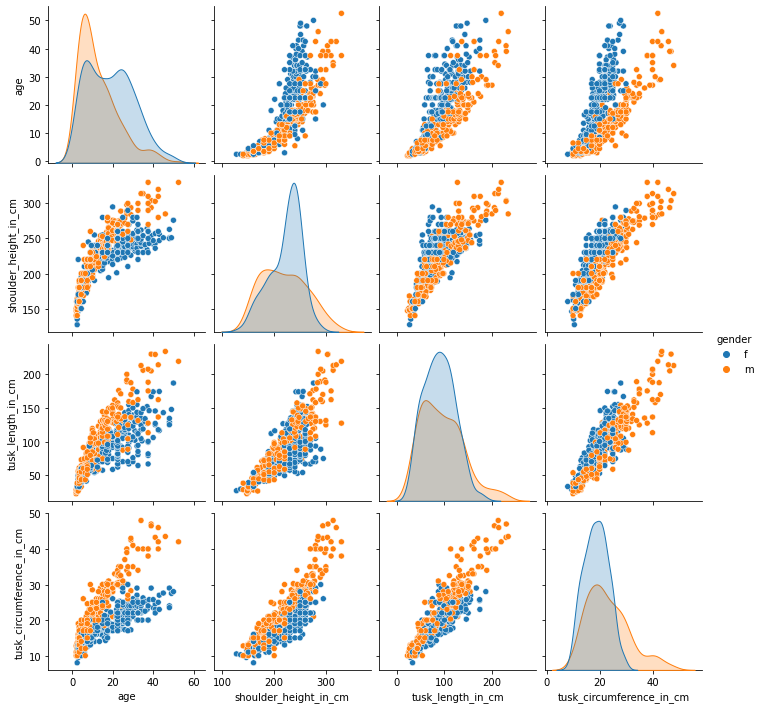

In [14]:
#with sns.axes_style('darkgrid'):
#    chart = sns.pairplot(data=df, hue = 'gender', diag_kind ='hist')

sns.pairplot(df, hue = 'gender');


### Examine inter-column correlation. Produce histograms to check data distribution. 

,age,shoulder_height_in_cm,tusk_length_in_cm,tusk_circumference_in_cm
age,1.000000,0.812112,0.785125,0.684527
shoulder_height_in_cm,0.812112,1.000000,0.832777,0.831982
tusk_length_in_cm,0.785125,0.832777,1.000000,0.871525
tusk_circumference_in_cm,0.684527,0.831982,0.871525,1.000000


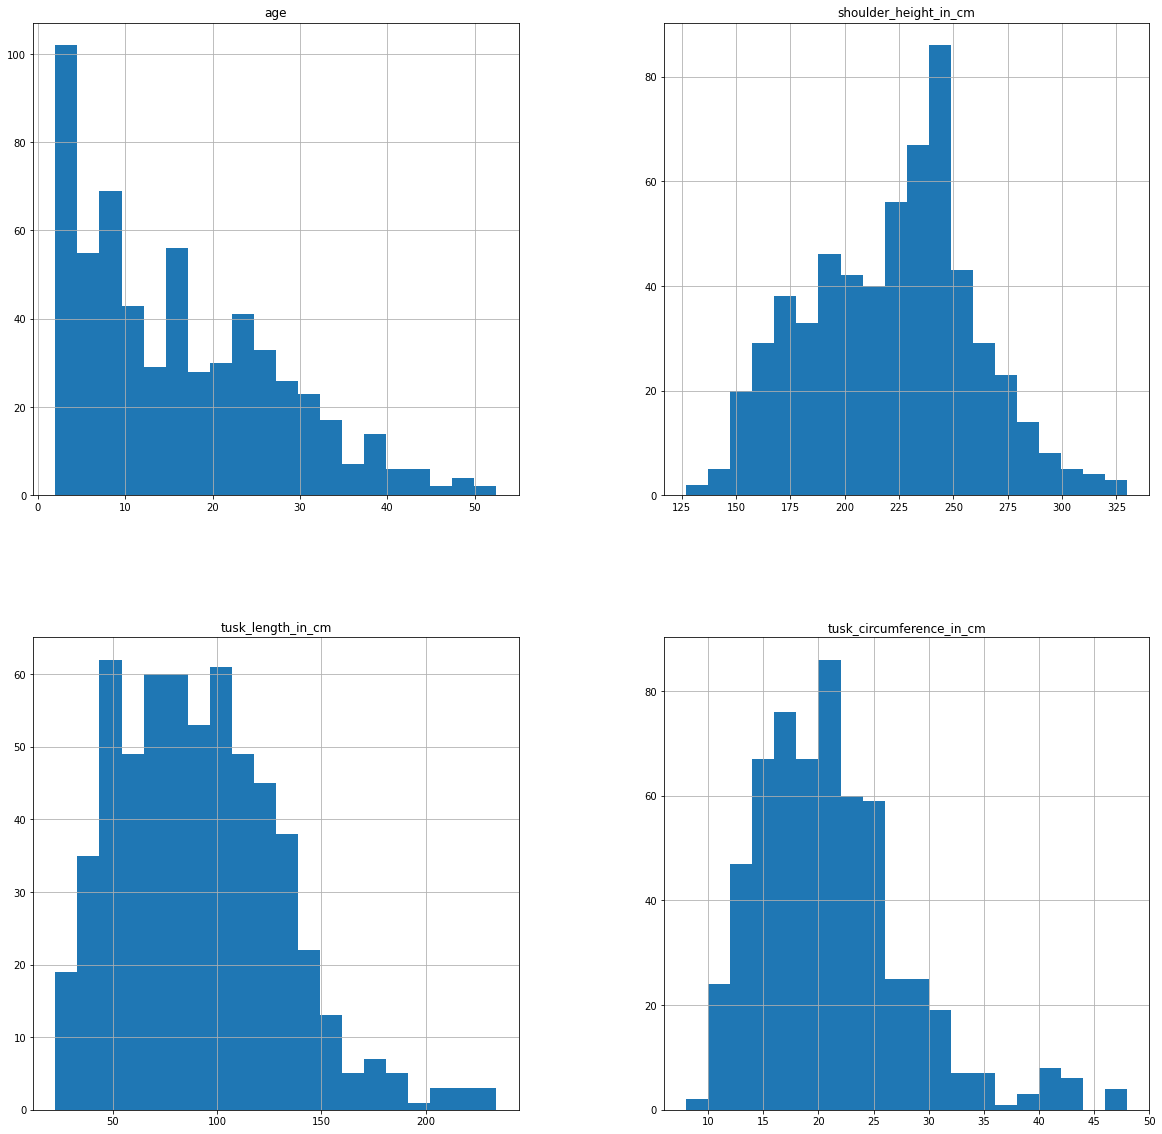

In [15]:
df.hist(figsize = (20,20), bins = 20)
df.corr()

## Visualizing regression models

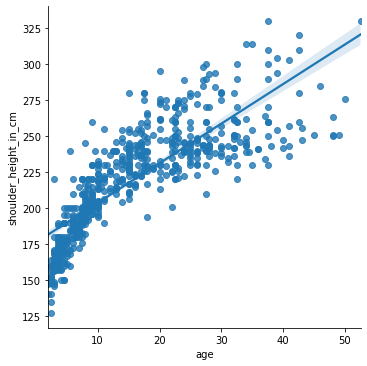

In [16]:
sns.lmplot(data=df, x = 'age', y = 'shoulder_height_in_cm')

### Key data segregated by gender

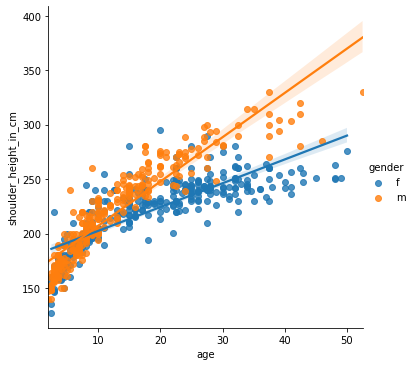

In [17]:
sns.lmplot(data=df, x = 'age', y = 'shoulder_height_in_cm', hue = 'gender');

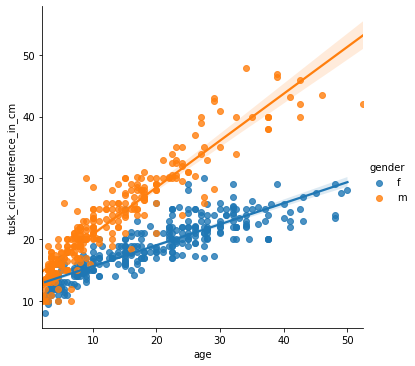

In [18]:
sns.lmplot(data=df, x = 'age', y = 'tusk_circumference_in_cm', hue = 'gender');

## Import Python libraries for machine learning

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [20]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())
df.corr()


,age,shoulder_height_in_cm,tusk_length_in_cm,tusk_circumference_in_cm
age,1.000000,0.812112,0.785125,0.684527
shoulder_height_in_cm,0.812112,1.000000,0.832777,0.831982
tusk_length_in_cm,0.785125,0.832777,1.000000,0.871525
tusk_circumference_in_cm,0.684527,0.831982,0.871525,1.000000


<AxesSubplot:>

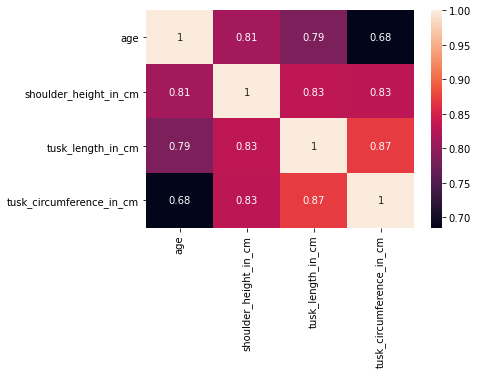

In [21]:
sns.heatmap(df.corr(), annot = True)

## Set independent (X) and dependent variables (y)

In [22]:
X = df[['tusk_length_in_cm']] 
y = df['age']

### fit the regression model

In [23]:
reg = LinearRegression().fit(X, y)
reg.predict([[100]])

array([18.0061581])

### Test accuracy of the model with reg.score

In [24]:
print('Reg score : ' + str(round(reg.score(X, y),3)))

Reg score : 0.616


### Improve prediction score by adding additional columns

In [25]:
X = df[['tusk_length_in_cm','shoulder_height_in_cm', 'tusk_circumference_in_cm']] 
y = df['age']

In [26]:
reg = LinearRegression().fit(X, y)
reg.predict([[100, 200, 20]])

array([13.96321566])

In [27]:
print('Reg score :' + str(round(reg.score(X, y),3)))

Reg score :0.713


### Seek to further improve prediction score by adding categorical and other columns

In [28]:
X = df[['tusk_length_in_cm','shoulder_height_in_cm', 'tusk_circumference_in_cm', 'gender']] 
X = pd.get_dummies(data=X, drop_first=True)
y = df['age']

In [29]:
X

,tusk_length_in_cm,shoulder_height_in_cm,tusk_circumference_in_cm,gender_m
15,30.0,149.0,10.5,0
16,27.0,151.0,10.5,0
17,27.0,127.0,10.5,0
18,32.0,156.0,11.0,0
19,28.5,146.0,9.5,0
...,...,...,...,...
772,127.4,330.0,38.0,1
773,207.6,290.0,40.0,1
774,214.1,320.0,46.0,1
775,162.3,310.0,42.0,1


In [30]:
reg = LinearRegression().fit(X, y)

### Make a prediction

In [31]:
('Age prediction : ' + str(round(reg.predict([[100, 210, 21, 0]])[0])))

'Age prediction : 20'

In [32]:
print('Reg score :' + str(round(reg.score(X, y),3)))

Reg score :0.783


### Use of a user defined function to streamline the input of independent variables for the output of a dependent variable

In [33]:
def age(tusk_len, sh_h, tusk_circum, gender):
    """ 
    user defined function to predict age. Requires tusk_length_in_cm,
    shoulder_height_in_cm, tusk_circumference_in_cm, gender: 1 = male, 0 = female
    """
    return round(reg.predict([[tusk_len, sh_h, tusk_circum, gender]])[0])
   

### Use user defined function to make a prediction

In [34]:
age(91.8, 220.7, 21, 0)

20

### Evaluating the model using hold-out testing

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
round(mean_squared_error(y_test, y_pred)**0.5, 3)

4.977

In [36]:
round(reg.score(X_test, y_test),3)

0.744

# Decision Tree and Random Forrest models

## Decision Tree

Split into training and testing data

In [37]:
X = df[['tusk_length_in_cm','shoulder_height_in_cm', 'tusk_circumference_in_cm', 'gender']] 
X = pd.get_dummies(data=X, drop_first=True)
feature_names = ['tusk_length_in_cm','shoulder_height_in_cm', 'tusk_circumference_in_cm', 'gender_m']

In [38]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=1)

In [39]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
dt_model = DecisionTreeRegressor(random_state=1, max_depth =3)
# Fit dt_model with the training data.
dt_model.fit(train_X,train_y)

DecisionTreeRegressor(max_depth=3, random_state=1)

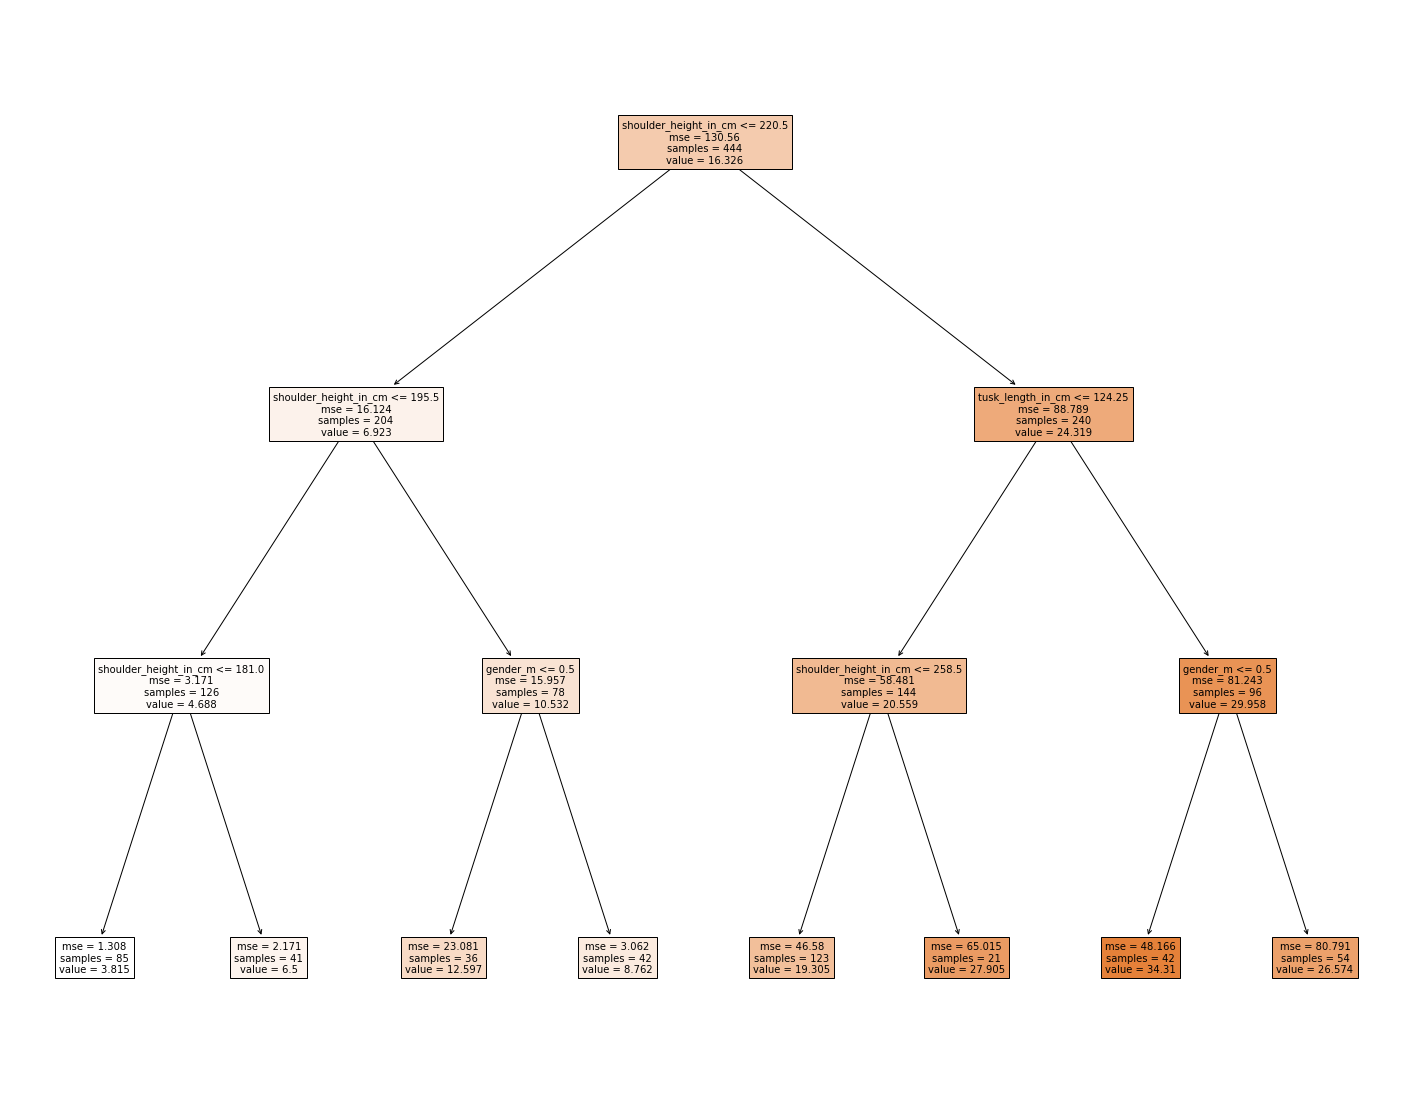

In [40]:
plt.figure(figsize=(25,20))
tree.plot_tree(dt_model, feature_names=feature_names, filled=True);

Make Predictions with Validation data - MAE calculated from first principles & through sklearn

In [41]:
val_predictions = dt_model.predict(val_X)

In [42]:
print(val_predictions[0:5])
print( val_y.head())

[12.59722222  3.81470588 26.57407407  3.81470588 27.9047619 ]
702    22.5
515     3.5
565    15.0
681     4.5
639    30.0
Name: age, dtype: float64


In [43]:
comparison_dict = {"actual":val_y.head(), "prediction":val_predictions[0:5]}
comparison_df = pd.DataFrame(comparison_dict)
comparison_df

,actual,prediction
702,22.5,12.597222
515,3.5,3.814706
565,15.0,26.574074
681,4.5,3.814706
639,30.0,27.904762


In [44]:
comparison_df["error"] = abs(comparison_df["actual"] - comparison_df["prediction"] ) 

In [45]:
comparison_df

,actual,prediction,error
702,22.5,12.597222,9.902778
515,3.5,3.814706,0.314706
565,15.0,26.574074,11.574074
681,4.5,3.814706,0.685294
639,30.0,27.904762,2.095238


In [46]:
round(comparison_df["error"].mean(),3)

4.914

In [47]:
from sklearn.metrics import mean_absolute_error

round(mean_absolute_error(val_y.head(),val_predictions[0:5]),3) #for the top 5 outcomes

4.914

In [48]:
round(mean_absolute_error(val_predictions, val_y),3)

4.521

### hyper parameter tuning

using a user defined function to ascertain the optimum decision tree depth 

In [49]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    """
    Function to get the MAE
    """
    model = DecisionTreeRegressor(max_depth=candidate_max_depth, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [50]:
candidate_max_depths = range(1,10,1)

for candidate_max_depth in candidate_max_depths:
        my_mae = get_mae(candidate_max_depth, train_X, val_X, train_y, val_y)
        print("Max leaf depth: %d  \t\t Mean Absolute Error:  %d" %(candidate_max_depth, my_mae))

Max leaf depth: 1  		 Mean Absolute Error:  5
Max leaf depth: 2  		 Mean Absolute Error:  4
Max leaf depth: 3  		 Mean Absolute Error:  4
Max leaf depth: 4  		 Mean Absolute Error:  3
Max leaf depth: 5  		 Mean Absolute Error:  3
Max leaf depth: 6  		 Mean Absolute Error:  3
Max leaf depth: 7  		 Mean Absolute Error:  3
Max leaf depth: 8  		 Mean Absolute Error:  3
Max leaf depth: 9  		 Mean Absolute Error:  3


Re-run decision tree model with optimised max depth of 4

In [51]:
dt_model = DecisionTreeRegressor(random_state=1, max_depth =4)
dt_model.fit(train_X,train_y)

DecisionTreeRegressor(max_depth=4, random_state=1)

In [52]:
val_predictions2 = dt_model.predict(val_X)

In [53]:
round(mean_absolute_error(val_predictions2, val_y),3)

3.849

## Random Forrest regression ensemble model

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
X = df[['tusk_length_in_cm','shoulder_height_in_cm', 'tusk_circumference_in_cm', 'gender']] 
X = pd.get_dummies(data=X, drop_first=True)
#feature_names = ['tusk_length_in_cm','shoulder_height_in_cm', 'tusk_circumference_in_cm', 'gender_m']

In [56]:
# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(train_X,train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
pred = rf_model.predict(val_X)

rf_val_mae = mean_absolute_error(val_y, pred)

print("Validation MAE for Random Forest Model:", round(rf_val_mae,2))

Validation MAE for Random Forest Model: 3.29


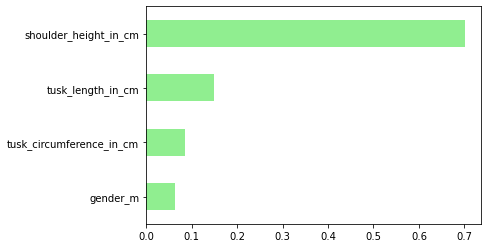

In [57]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf_model.feature_importances_, index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

## Inclusion of other Python techniques not explicitly required in the machine learning project but included for the purposes of demonstrating ability for the project

### Create a fictitious second dataset of  elephant types to demonstrate ability in joining datafremes on a common column (Elephant ID)

In [58]:
df.head()

,Year_of data_collection,ID,gender,age,shoulder_height_in_cm,tusk_length_in_cm,tusk_circumference_in_cm
15,1966-68,58,f,2.5,149.0,30.0,10.5
16,1966-68,78,f,2.5,151.0,27.0,10.5
17,1966-68,86,f,2.5,127.0,27.0,10.5
18,1966-68,293,f,2.5,156.0,32.0,11.0
19,1966-68,29,f,3.0,146.0,28.5,9.5


In [59]:
elephant_type_list = ['African bush elephant', 'African forrest elephant', 'Asian elephant']

#### generate a random dataframe of elephant types from a defined types list

In [60]:
import random
my_list = random.choice(elephant_type_list)
et_df = []
for i in range(593):
    my_list = random.choice(elephant_type_list)
    et_df.append(my_list)  

In [61]:
df2 = pd.DataFrame (et_df, columns = ['Elephant_type'])

In [62]:
df['ID'].to_csv('File_2.csv', index = False)

In [63]:
elephant_type_df = pd.read_csv('e_type.csv')

In [64]:
elephant_type_df.head()

,ID,Elephant_type
0,58,African bush elephant
1,78,African bush elephant
2,86,Asian elephant
3,293,African forrest elephant
4,29,African forrest elephant


In [65]:
df['ID'] = df['ID'].astype(int)

In [66]:
merged_df = pd.merge(df, elephant_type_df, on ='ID')

In [67]:
merged_df.head()

,Year_of data_collection,ID,gender,age,shoulder_height_in_cm,tusk_length_in_cm,tusk_circumference_in_cm,Elephant_type
0,1966-68,58,f,2.5,149.0,30.0,10.5,African bush elephant
1,1966-68,58,f,2.5,149.0,30.0,10.5,African forrest elephant
2,1966-68,58,f,2.5,149.0,30.0,10.5,Asian elephant
3,1966-68,58,f,2.5,149.0,30.0,10.5,Asian elephant
4,1966-68,58,m,30.0,280.0,158.0,41.0,African bush elephant


### Generate graphs

In [68]:
age = df['age']
age_neg = df['age']*-1
age_m = df['age'] [df['gender']=='m'] #age - male
age_f = df['age'] [df['gender']=='f'] #age - female
age_neg_m = age_neg *-1 #ageage_neg *-1 - male
shoulder_h = df['shoulder_height_in_cm']

shoulder_hf = df['shoulder_height_in_cm'] [df['gender']=='f'] #shoulder height - female
shoulder_hm = df['shoulder_height_in_cm'] [df['gender']=='m'] #shoulder height - male
tusk_l = df['tusk_length_in_cm']
print(len(shoulder_h))
print(len(shoulder_hf)) # shoulder height  - female
print(len(shoulder_hm)) # shoulder height  - male

593
321
272


In [69]:
tusk_l = df['tusk_length_in_cm']

tusk_lf = df['tusk_length_in_cm'] [df['gender']=='f'] #tusk length - female
tusk_lm = df['tusk_length_in_cm'] [df['gender']=='m'] #tusk length - male

print(len(tusk_l))
print(len(tusk_lf)) # tusk length - female
print(len(tusk_lm))# tusk length - male

593
321
272


In [70]:
def my_data_plot(axes, x, y, color, xlabel, ylabel):
    axes.barh(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.tick_params('y')

<Figure size 1080x576 with 0 Axes>

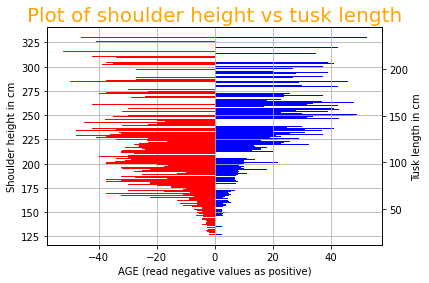

In [71]:
plt.figure(figsize=(15,8))
fig, ax = plt.subplots()
#ax.set_xticks(Year)
ax.grid(True)
my_data_plot(ax,shoulder_h, age, 'blue', 'AGE (read negative values as positive)', 'Shoulder height in cm')

ax2 = ax.twinx()
my_data_plot(ax2,tusk_l, age_neg, 'red', 'age', 'Tusk length in cm')
plt.title('Plot of shoulder height vs tusk length', color = 'orange', size = 20);

### Graph above is inconclusive so data is segregated and plotted by gender

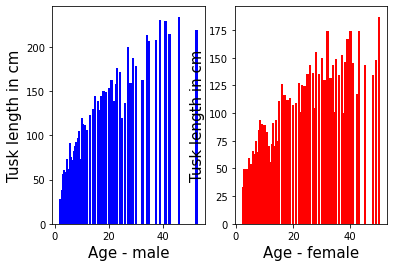

In [72]:
fig, ax = plt.subplots(1, 2)

plt.rcParams["figure.figsize"] = (10,5)
ax[0].bar(df_m["age"], df_m["tusk_length_in_cm"],color='b')
ax[1].bar(df_f["age"], df_f["tusk_length_in_cm"],color='r')
ax[0].set_ylabel("Tusk length in cm", fontsize = 15)
ax[1].set_ylabel("Tusk length in cm", fontsize = 15)
ax[0].set_xlabel("Age - male", fontsize = 15)
ax[1].set_xlabel("Age - female", fontsize = 15);

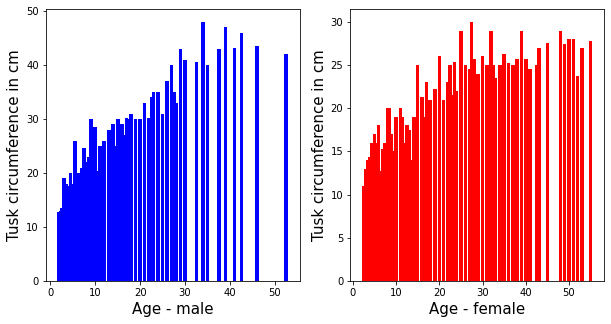

In [73]:
fig, ax = plt.subplots(1, 2)

plt.rcParams["figure.figsize"] = (10,5)
ax[0].bar(df_m["age"], df_m["tusk_circumference_in_cm"],color='b')
ax[1].bar(df_f["age"], df_f["tusk_circumference_in_cm"],color='r')
ax[0].set_ylabel("Tusk circumference in cm", fontsize = 15)
ax[1].set_ylabel("Tusk circumference in cm", fontsize = 15)
ax[0].set_xlabel("Age - male", fontsize = 15)
ax[1].set_xlabel("Age - female", fontsize = 15);

C:\Users\joemahon\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


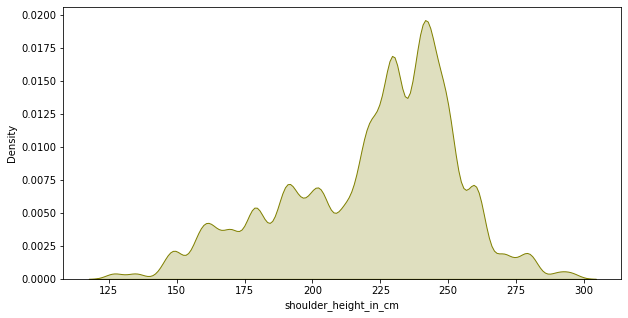

In [74]:
sns.kdeplot(shoulder_hf, shade=True, bw=0.1, color='olive')
plt.show()

<AxesSubplot:xlabel='tusk_length_in_cm', ylabel='shoulder_height_in_cm'>

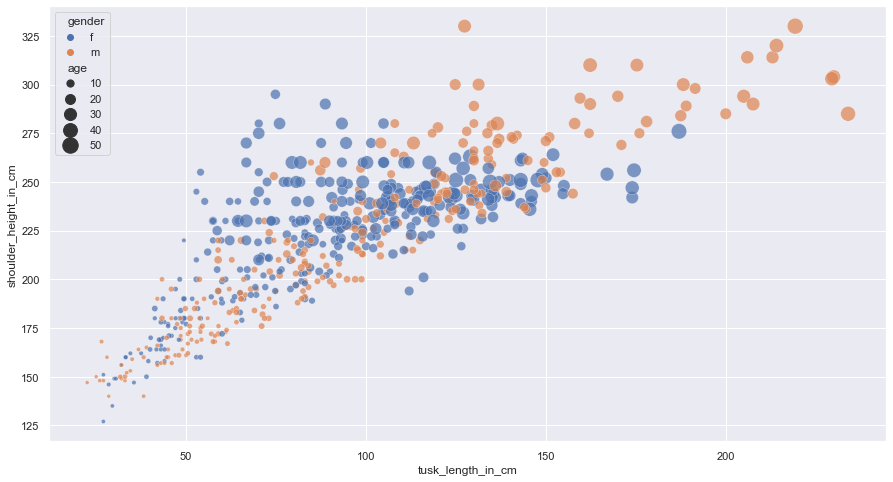

In [75]:
sns.set(rc={"figure.figsize":(15, 8)}) 

sns.scatterplot(data=df, x='tusk_length_in_cm', y= 'shoulder_height_in_cm', size= 'age', hue = 'gender', alpha = 0.7, sizes=(15, 250))

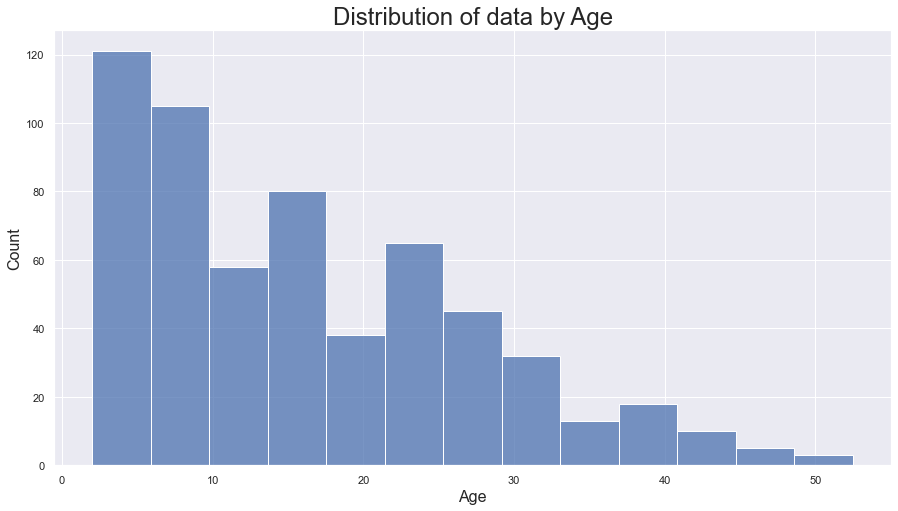

In [76]:
sns.histplot(data=df, x="age")
plt.xlabel("Age", size=16)
plt.ylabel("Count", size=16)
plt.title("Distribution of data by Age", size=24);